merge_split\b007.tif


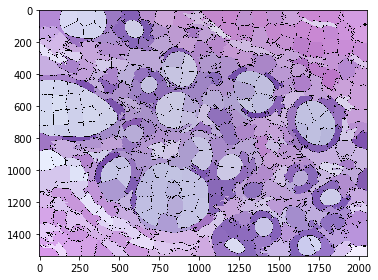

merge_split\b008.tif


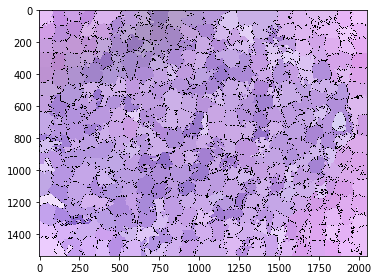

merge_split\b009.tif


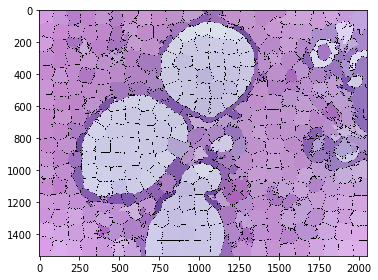

merge_split\b010.tif


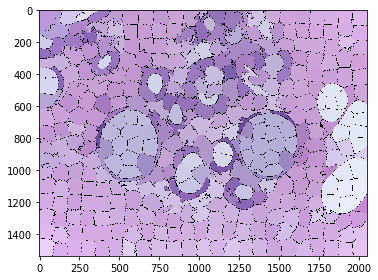

merge_split\b011.tif


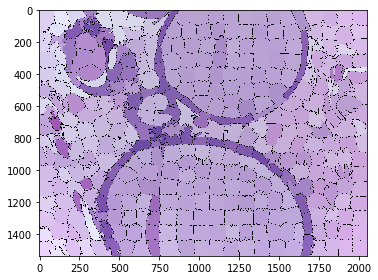

merge_split\b012.tif


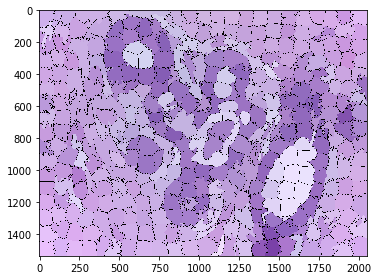

merge_split\b013.tif


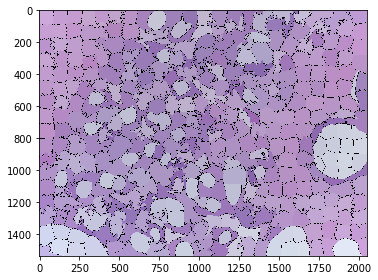

merge_split\b014.tif


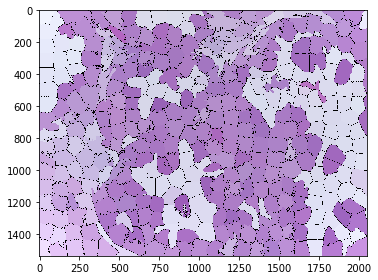

merge_split\b015.tif


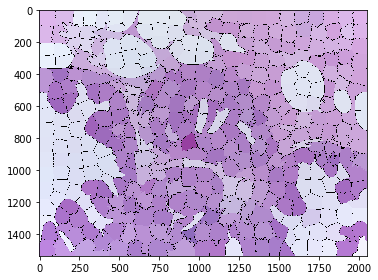

merge_split\is001.tif


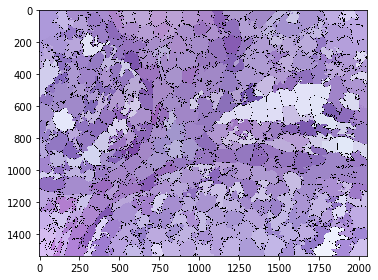

merge_split\is002.tif


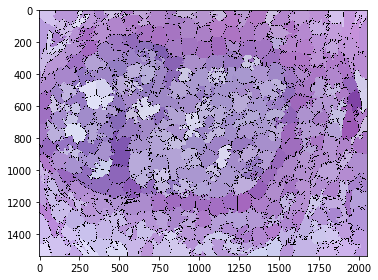

merge_split\is003.tif


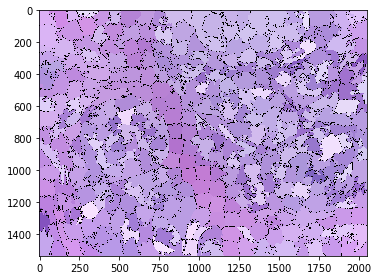

merge_split\is004.tif


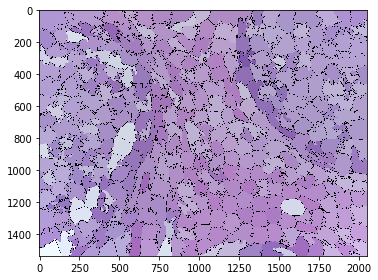

merge_split\is005.tif


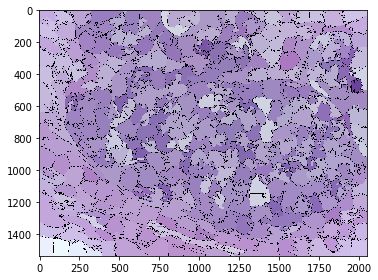

merge_split\is006.tif


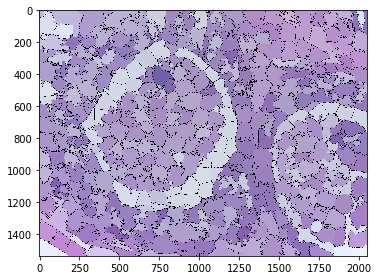

merge_split\is007.tif


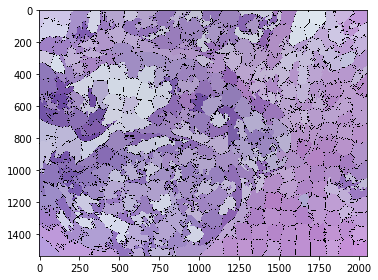

merge_split\is008.tif


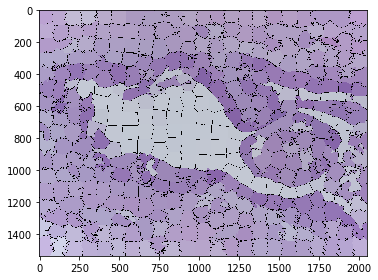

merge_split\is009.tif


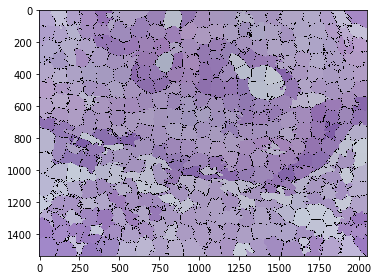

merge_split\is010.tif


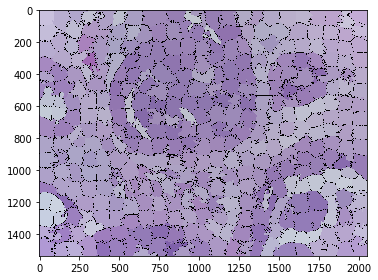

merge_split\is011.tif


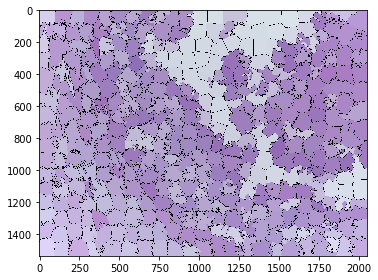

merge_split\is012.tif


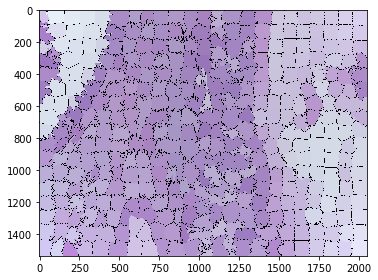

merge_split\is013.tif


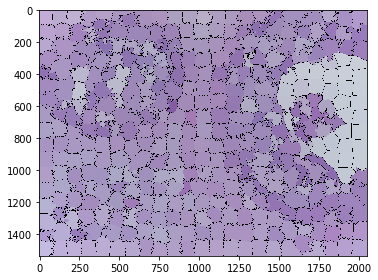

merge_split\is014.tif


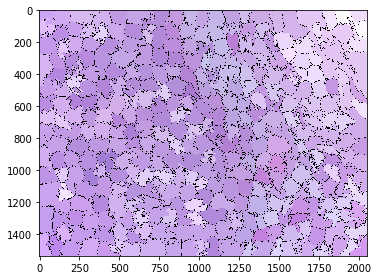

merge_split\is015.tif


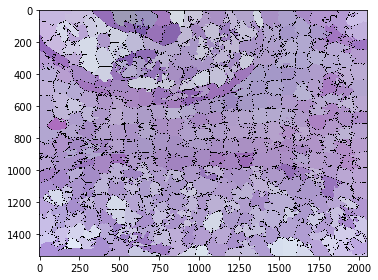

merge_split\iv001.tif


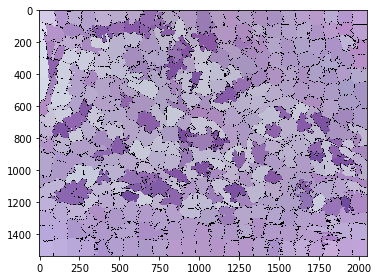

merge_split\iv002.tif


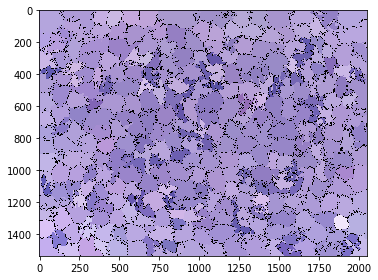

merge_split\iv003.tif


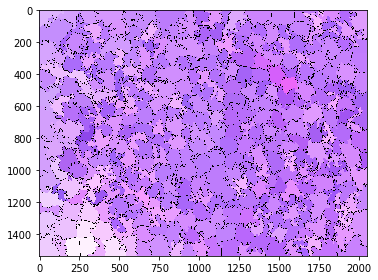

merge_split\iv004.tif


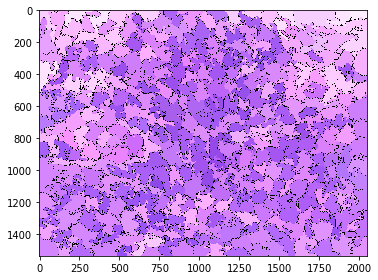

merge_split\iv005.tif


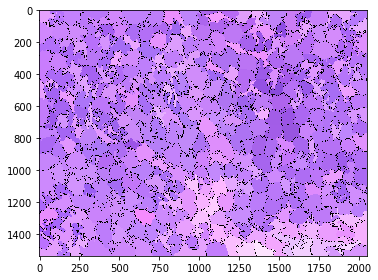

merge_split\iv006.tif


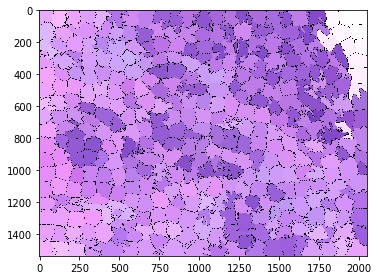

merge_split\iv007.tif


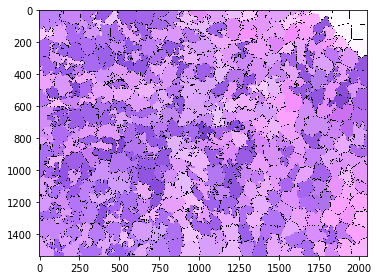

merge_split\iv008.tif


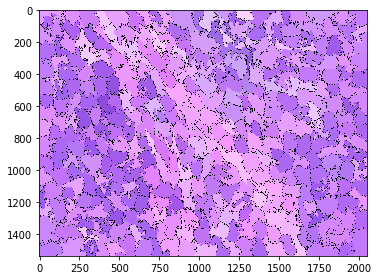

merge_split\iv009.tif


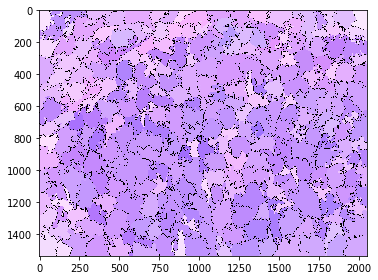

merge_split\iv010.tif


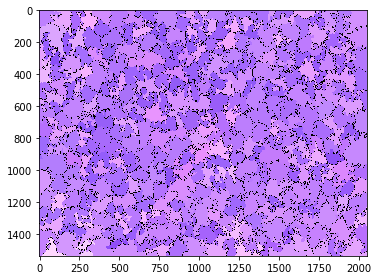

merge_split\iv011.tif


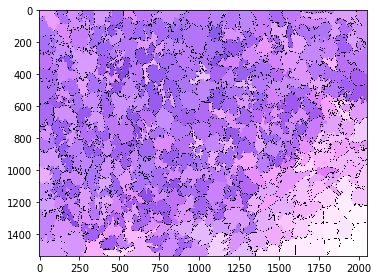

merge_split\iv012.tif


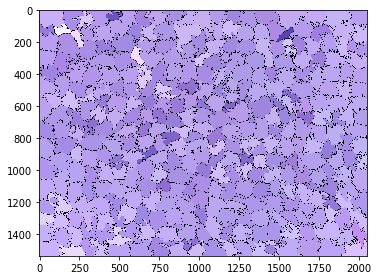

merge_split\iv013.tif


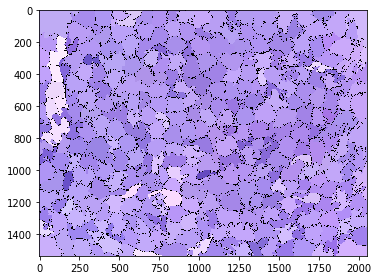

merge_split\iv014.tif


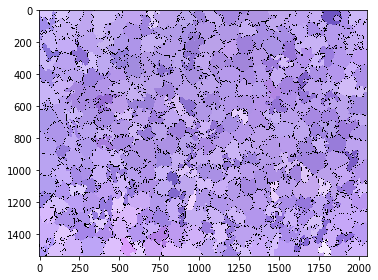

merge_split\iv015.tif


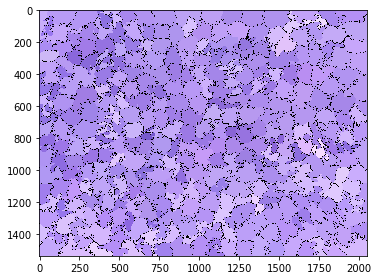

merge_split\n001.tif


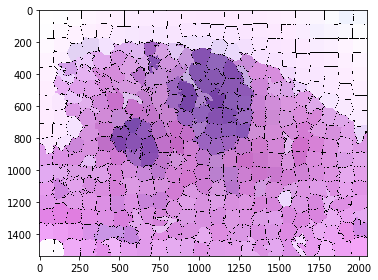

merge_split\n002.tif


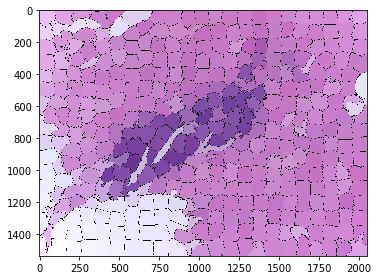

merge_split\n003.tif


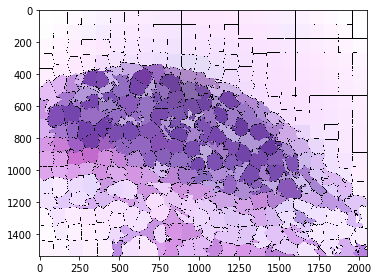

merge_split\n004.tif


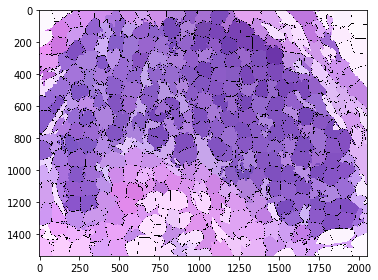

merge_split\n005.tif


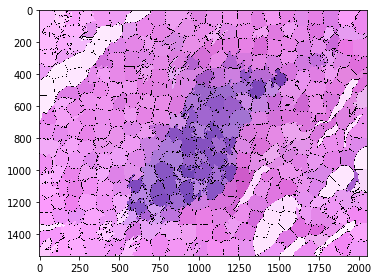

merge_split\n006.tif


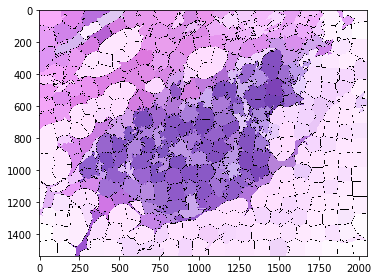

merge_split\n007.tif


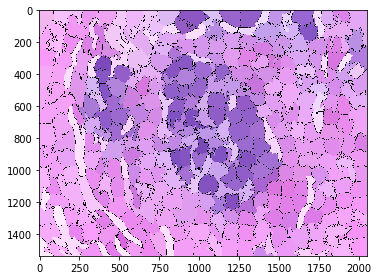

merge_split\n008.tif


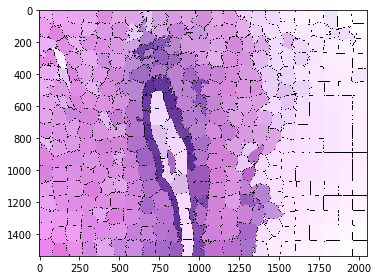

merge_split\n009.tif


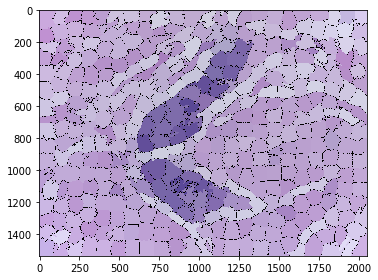

merge_split\n010.tif


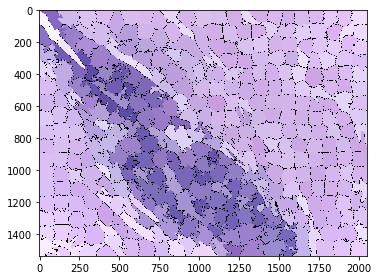

merge_split\n011.tif


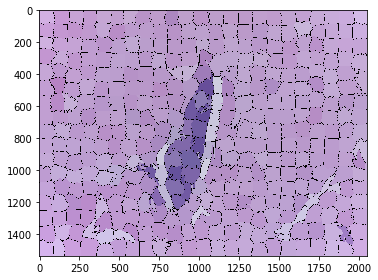

merge_split\n012.tif


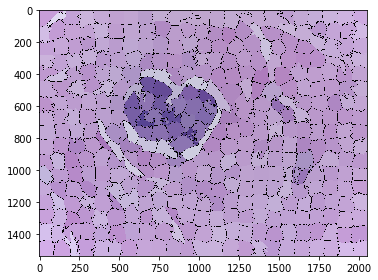

merge_split\n013.tif


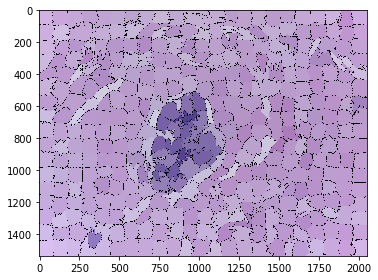

merge_split\n014.tif


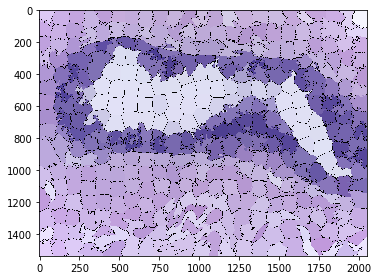

merge_split\n015.tif


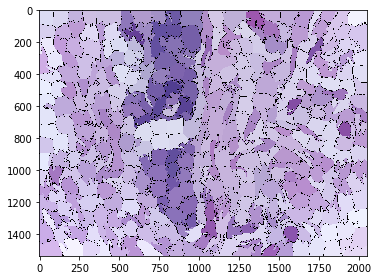

In [6]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np
from skimage.io import imread
import glob

def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])

location_of_files = 'merge_split\\*.tif'
fileList = glob.glob(location_of_files)
for i in fileList:

    print(i)
    img = imread(i)
    labels = segmentation.slic(img, compactness=30, n_segments=400)
    g = graph.rag_mean_color(img, labels)

    labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                       in_place_merge=True,
                                       merge_func=merge_mean_color,
                                       weight_func=_weight_mean_color)

    out = color.label2rgb(labels2, img, kind='avg')
    out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
    io.imshow(out)
    io.show()
   # cv2.imwrite(i,out)